In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("weak acid base rxns.csv")

# Define features and targets
X = df[['reactant1_conc', 'reactant2_conc']]
y = df.drop(columns=['reactant1_conc', 'reactant2_conc'])

# Split into training and test sets 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
#Random Forest Regressor uses several different regression models to train, in a decision tree type style (hence forest)
#Bootstraps are used (Central Limit Theorem) and random feature selection. 
#The tree itself comes up with several predictions and the average of those predictions is typically the one shown
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Showing results
print('MSE: '+ str(mse))
print('R^2: ' + str(r2))


#[1] OpenAI ChatGPT-4. Accessed on March 30, 2024 from https://chat.openai.com/. Prompt chain:{'What Machine Learning model would be best for this data'}

MSE: 1.1298317996666653e-06
R^2: 0.9998976525794099


In [8]:
import pandas as pd
# Going further into the predictions on a larger dataset that can be used for visualizations and further examination
# Load new dataset for testing
new_data = pd.read_csv("test data weak acid base rxns.csv")

# making sure the correct columns are used 
X_new = new_data[['reactant1_conc', 'reactant2_conc']]

# Use the trained model to predict outcomes for the testing data
new_predictions = model.predict(X_new)

# Convert predictions to DataFrame style of storage 
predicted_df = pd.DataFrame(new_predictions, columns=y.columns)

# Save and view the predictions
predicted_df.to_csv("predicted_equilibrium_concentrations.csv", index=False)
print(predicted_df.head())
#[2] OpenAI ChatGPT-4. Accessed on March 30, 2024 from https://chat.openai.com/. Prompt chain:{'What is the best way to display the machine predictions'}

   HCOOH_NH3_conc  HCOOH_H2O_conc  HCOOH_H2NCH3_conc  HCN_NH3_conc  \
0        0.184218        0.164372           0.191478      0.182449   
1        0.021053        0.018803           0.021885      0.020851   
2        0.119371        0.106489           0.124050      0.118222   
3        0.101505        0.090529           0.105500      0.100508   
4        0.125914        0.112300           0.130809      0.124649   

   HCN_H2O_conc  HCN_H2NCH3_conc  CH3OHCOOH_NH3_conc  CH3OHCOOH_H2O_conc  \
0      0.162553         0.189671            0.160762            0.142683   
1      0.018568         0.021683            0.018366            0.016298   
2      0.105336         0.122897            0.104132            0.092444   
3      0.089543         0.104489            0.088534            0.078619   
4      0.111087         0.129607            0.109875            0.097525   

   CH3OHCOOH_H2NCH3_conc  
0               0.164372  
1               0.018803  
2               0.106489  
3             

In [15]:
from sklearn.metrics import r2_score

# Finding the R^2 values of predictions on the testing dataset. 
y_true = new_data.drop(columns=['reactant1_conc', 'reactant2_conc'])
r2 = r2_score(y_true, new_predictions)

print("R^2 on new data: " + str(r2))
#[3] OpenAI ChatGPT-4. Accessed on March 30, 2024 from https://chat.openai.com/. Prompt chain:{'How would you find the coefficient of determination for the testing data?'}

R^2 on new data: 0.9999004592100194


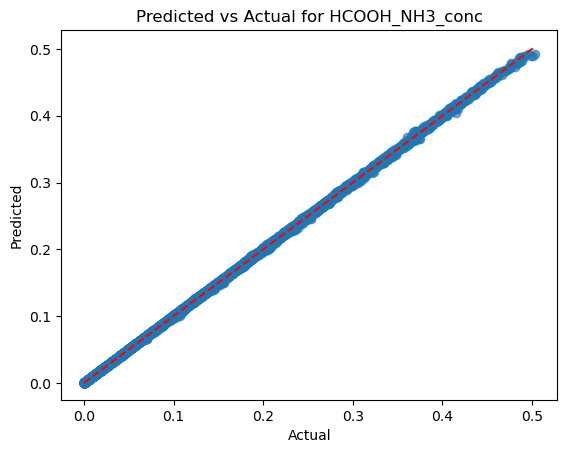

In [16]:
import matplotlib.pyplot as plt

# Visualization for one concentration column('HCOOH_NH3_conc) of predictions vs. actual 
col = 'HCOOH_NH3_conc'
plt.scatter(y_true[col], new_predictions[:, y.columns.get_loc(col)], alpha=0.6)
plt.plot([y_true[col].min(), y_true[col].max()],
         [y_true[col].min(), y_true[col].max()],
         'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Predicted vs Actual for HCOOH_NH3_conc')
plt.show()
#[4] OpenAI ChatGPT-4. Accessed on March 30, 2024 from https://chat.openai.com/. Prompt chain:{'Graph the testing data vs. the predictions'}

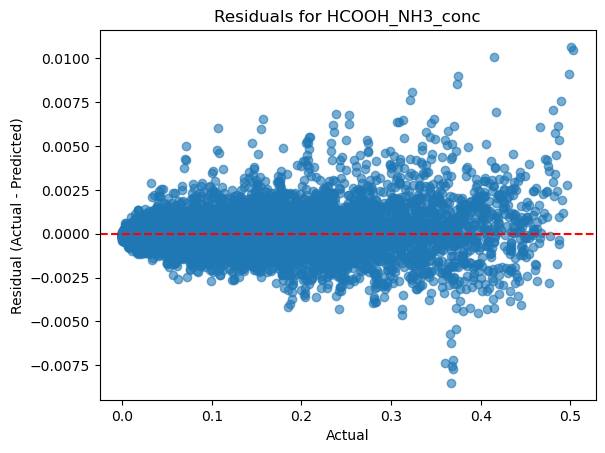

In [11]:
residuals = y_true[col] - new_predictions[:, y.columns.get_loc(col)]
plt.scatter(y_true[col], residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Actual")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals for ")
plt.show()
#[5] OpenAI ChatGPT-4. Accessed on March 30, 2024 from https://chat.openai.com/. Prompt chain:{'Make a residual graph'}

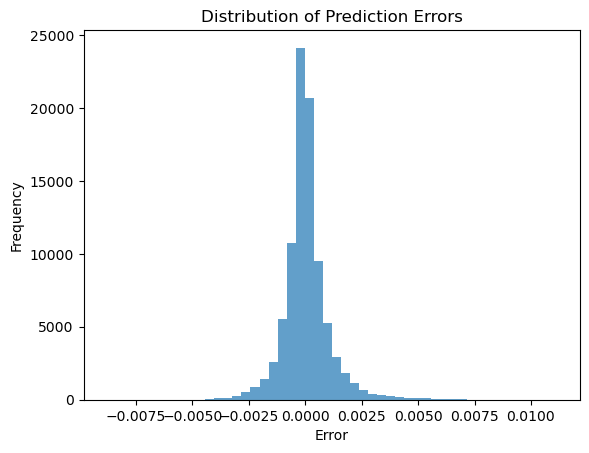

In [12]:
errors = y_true.values - new_predictions
plt.hist(errors.flatten(), bins=50, alpha=0.7)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()
#[6] OpenAI ChatGPT-4. Accessed on March 30, 2024 from https://chat.openai.com/. Prompt chain:{'What other visualizations would be useful to have?'}

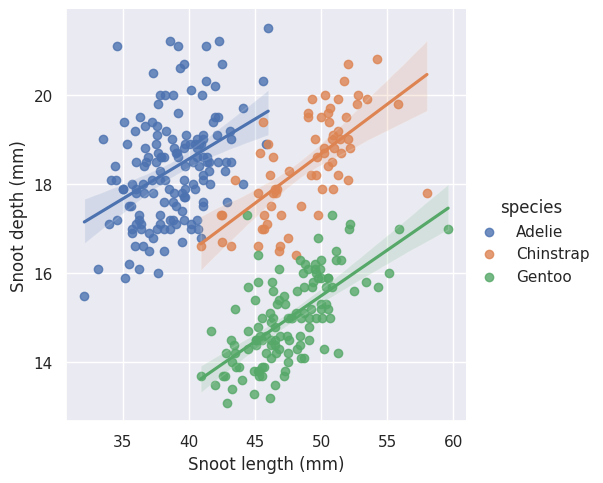

In [1]:
import seaborn as sns
sns.set_theme()

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=predicted_df,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")